Libraries

In [89]:
import sys
import numpy as np #Linear Algebra
import pandas as pd #Data Processing import seaborn as sns #Data Visualizaton
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #LabelEncoding From Sklearn
from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding From Sklearn
from sklearn.model_selection import train_test_split #Split Data in Train & Test Array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier #ML Algorithm
from sklearn.metrics import accuracy_score #Calculate Accuracy Score
import sklearn.metrics as metrics #Confusion Matrix

Import Dataset

In [90]:
df=pd.read_csv("flightdata.csv")

Dataset Analyses

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [92]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


Handling Missing Values

In [93]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [94]:
df=df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Data Visualization 

Text(0.5, 1.0, 'Scatter plot')

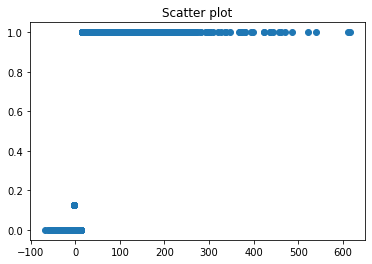

In [95]:
plt.scatter(df['ARR_DELAY'],df['ARR_DEL15'])
plt.title("Scatter plot")

Text(0.5, 1.0, 'Bar Chart')

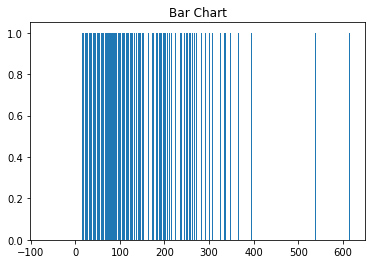

In [96]:
plt.bar(df['ARR_DELAY'],df['ARR_DEL15'])
plt.title("Bar Chart")

Text(0.5, 1.0, 'Histogram')

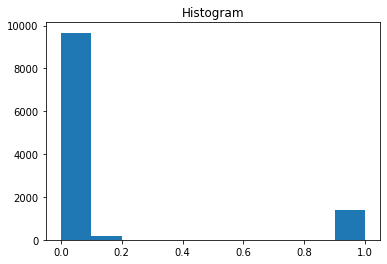

In [97]:
plt.hist(df['ARR_DEL15'])
plt.title("Histogram")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


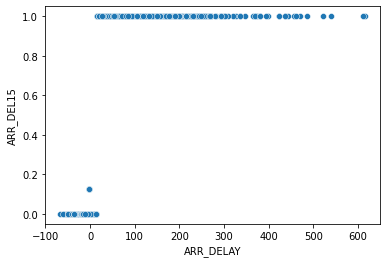

In [98]:
sns.scatterplot(df['ARR_DELAY'],df['ARR_DEL15'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


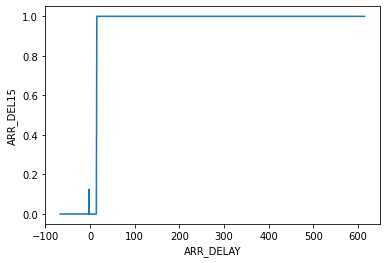

In [99]:
sns.lineplot(df['ARR_DELAY'],df['ARR_DEL15'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


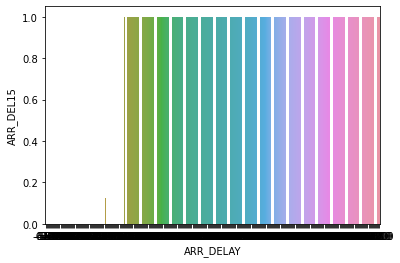

In [100]:
sns.barplot(df['ARR_DELAY'],df['ARR_DEL15'])

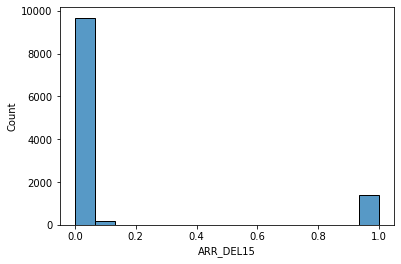

In [101]:
sns.histplot(df['ARR_DEL15'])

Droping Unnecessary Columns

In [102]:
X=df.drop(['YEAR','QUARTER','DAY_OF_WEEK','UNIQUE_CARRIER','DEP_DEL15','DEP_DELAY','ARR_TIME','ARR_DELAY','ARR_DEL15','CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','DISTANCE','Unnamed: 25','ORIGIN','DEST','TAIL_NUM'],axis='columns').astype(int)
y=df['ARR_DEL15'].astype(int)

In [103]:
#X[['DEP_TIME']]=X[['DEP_TIME']].fillna(X[['DEP_TIME']].mean())

In [104]:
#X[['DEP_TIME']]=X[['DEP_TIME']].astype(int)

In [105]:
X

,MONTH,DAY_OF_MONTH,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME
0,1,1,1399,10397,14747,1905,1907,2143
1,1,1,1476,11433,13487,1345,1344,1435
2,1,1,1597,10397,14747,940,942,1215
3,1,1,1768,14747,13487,819,820,1335
4,1,1,1823,14747,11433,2300,2256,607
...,...,...,...,...,...,...,...,...
11226,12,30,1715,11433,10397,1005,1003,1223
11227,12,30,1770,14747,13487,1525,1559,2046
11228,12,30,1823,11433,14747,1959,1959,2210
11229,12,30,1901,10397,14747,1530,1529,1806


In [106]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11226    0
11227    0
11228    0
11229    0
11230    0
Name: ARR_DEL15, Length: 11231, dtype: int64

In [107]:
#y=y.fillna(y.mean())

In [108]:
#y=y.astype(int)

In [109]:
#y

Label Encoder

In [110]:
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)

In [111]:
X.head(40)

,MONTH,DAY_OF_MONTH,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME
0,0,0,335,0,4,423,890,836
1,0,0,361,1,3,250,570,450
2,0,0,392,0,4,131,329,314
3,0,0,429,4,3,82,247,390
4,0,0,441,4,1,532,1113,47
5,0,0,469,3,0,191,434,471
6,0,1,496,0,3,390,809,709
7,0,1,509,3,4,386,815,707
8,0,1,525,3,4,181,422,361
9,0,1,540,3,0,275,627,621


Split & train Dataset

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7861, 8)
(3370, 8)
(7861,)
(3370,)


Decision Tree Classifier 

In [114]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Evaluation

In [115]:
dt.score(X_train,y_train)

1.0

In [116]:
dt.score(X_test,y_test)

0.8896142433234422

In [117]:
predict=dt.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
X_in=np.array([0,3,416,1,4,220,503,435])

In [119]:
y_pred=dt.predict([X_in])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [120]:
y_pred

array([0])

Saving The Model

In [121]:
with open('flight.pkl', 'wb') as files:
    pickle.dump(dt, files)